In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
print(tips.head(n=10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


In [3]:
menlunchtip = tips.loc[(tips
                        ['sex']=='Male')&(tips['time']=='Lunch'),'tip']
womenlunchtip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Lunch'),'tip']
mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Dinner'),'tip']
womendinnertip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Dinner'),'tip']


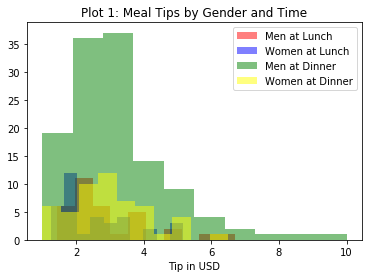

In [4]:
plt.hist(menlunchtip, color='red',  alpha=.5,label='Men at Lunch')  # alpha just controls the opacity
plt.hist(womenlunchtip, color='blue', alpha=.5,label='Women at Lunch')
plt.hist(mendinnertip, color='green', alpha=.5,label='Men at Dinner')  
plt.hist(womendinnertip, color='yellow', alpha=.5,label='Women at Dinner')
plt.xlabel('Tip in USD')
plt.legend(loc='upper right')
plt.title('Plot 1: Meal Tips by Gender and Time')
plt.show()

In [5]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic
print(sns)

<module 'seaborn' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>


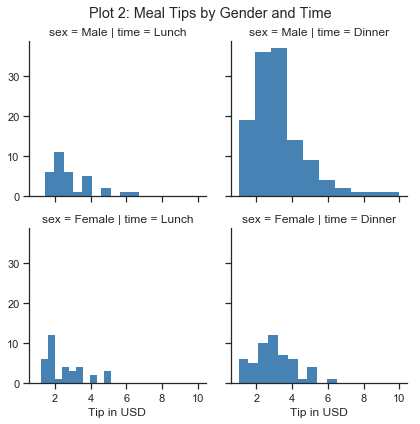

In [6]:
# Tell seaborn about the structure of our data.
g = sns.FacetGrid(tips, row="sex", col="time")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "tip", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2: Meal Tips by Gender and Time')
plt.show()

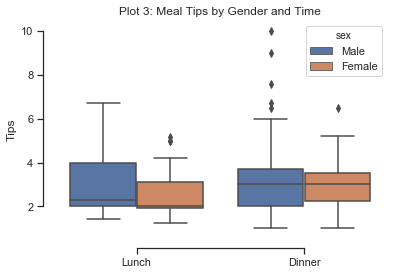

In [7]:
# Comparing groups using boxplots.
ax = sns.boxplot(x='time',y='tip',hue='sex',data=tips)  
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

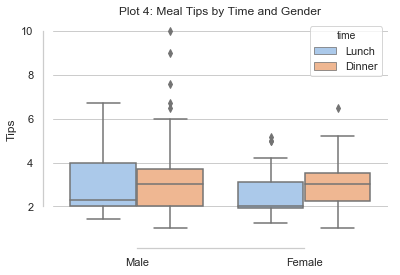

In [8]:
#Comparing groups again, but with a different emphasis.

# Setting the overall aesthetic.
sns.set(style="whitegrid")

ax = sns.boxplot(x='sex',y='tip',hue='time',data=tips,palette='pastel')  

plt.title('Plot 4: Meal Tips by Time and Gender')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

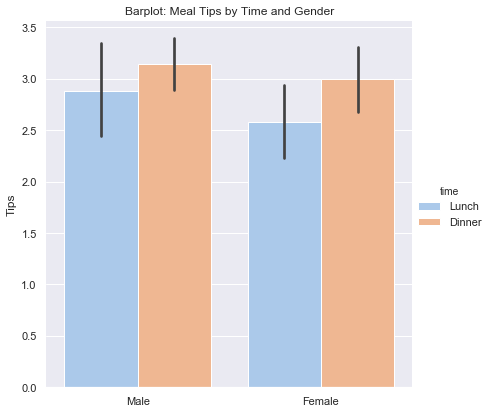

In [13]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.catplot(x="sex", y="tip", hue="time", data=tips, height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.show()

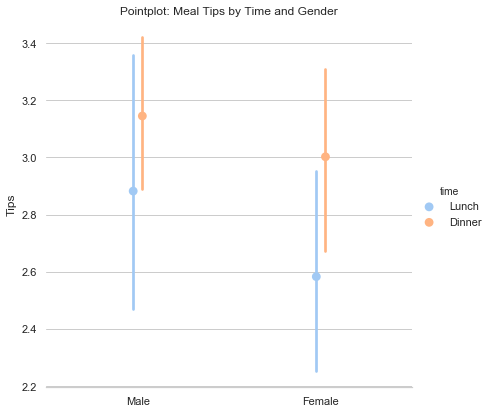

In [10]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.catplot(x="sex", y="tip", hue="time", data=tips,
                   height=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()

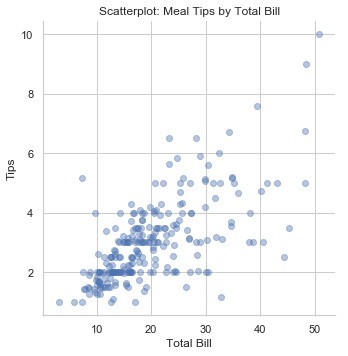

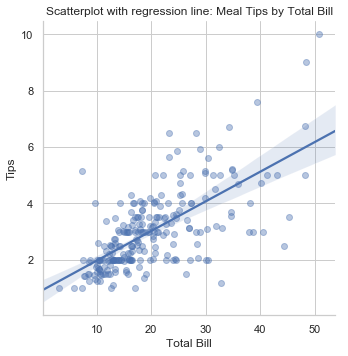

In [11]:
g = sns.lmplot(y='tip', # Variable 1.
               x='total_bill', # Variable 2.
               data=tips, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot: Meal Tips by Total Bill')
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               data=tips, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

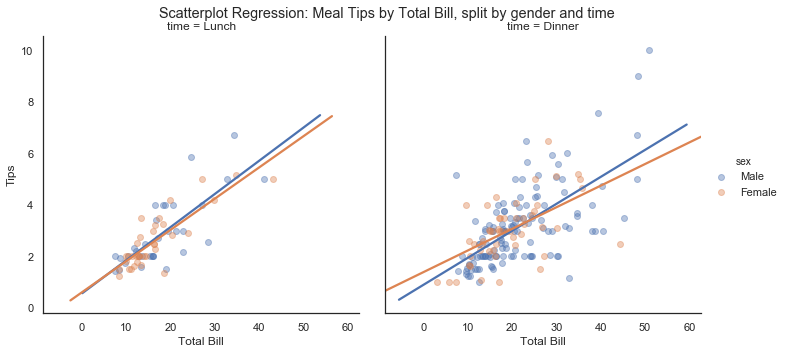

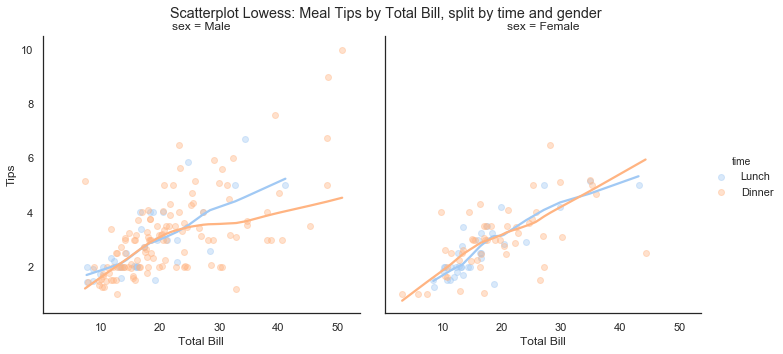

In [14]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='sex',
               data=tips, # Data.
               col='time',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='time',
               data=tips, # Data.
               col='sex',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()